In [2]:
# Importando Libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importando base de dados
base_dados = pd.read_csv('FIFA - 2022.csv')

In [6]:
# Head
base_dados.head()

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Argentina,7,6,0,1,15,8,7,18
1,2,France,7,5,0,2,16,8,8,15
2,3,Croatia,7,4,2,1,8,7,1,14
3,4,Morocco,7,4,1,2,6,5,1,13
4,5,England,5,3,1,1,13,4,9,10


In [7]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         32 non-null     int64 
 1   Team             32 non-null     object
 2   Games Played     32 non-null     int64 
 3   Win              32 non-null     int64 
 4   Draw             32 non-null     int64 
 5   Loss             32 non-null     int64 
 6   Goals For        32 non-null     int64 
 7   Goals Against    32 non-null     int64 
 8   Goal Difference  32 non-null     int64 
 9   Points           32 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.6+ KB


In [17]:
# Renomear Colunas
base_dados.rename(columns={'Position' : 'Posição', 'Team' : 'Time', 'Games Played' : 'Partidas', 'Win' : 'Vitoria', 'Draw' : 'Empate', 'Loss' : 'Derrota', 'Goals For' : 'Gols_Pro', 'Goals Against' : 'Gols_Contra', 'Goal Difference' : 'Gols_Diferença', 'Points' : 'Pontos'}, inplace=True)

In [18]:
# Análise por time dos gols feitos
analise_gols_pro = base_dados.groupby(by=['Time']).sum().reset_index()[['Time', 'Gols_Pro']].sort_values('Gols_Pro', ascending=False)
analise_gols_pro.head()

,Time,Gols_Pro
11,France,16
0,Argentina,15
10,England,13
20,Portugal,12
18,Netherlands,10


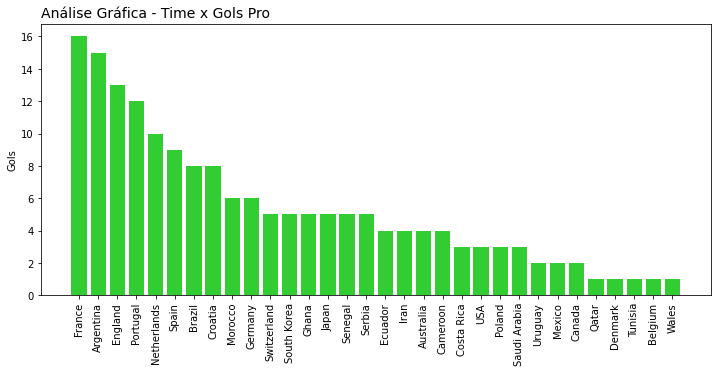

In [40]:
# Tamanho
plt.figure(figsize=(12,5))

# Gráfico
plt.title('Análise Gráfica - Time x Gols Pro', loc='left', fontsize=14)
plt.bar(analise_gols_pro.Time, analise_gols_pro['Gols_Pro'], color='#32CD32')

# Labels
plt.ylabel('Gols')

# Para ajustar o eixo x 
plt.xticks(rotation=90);

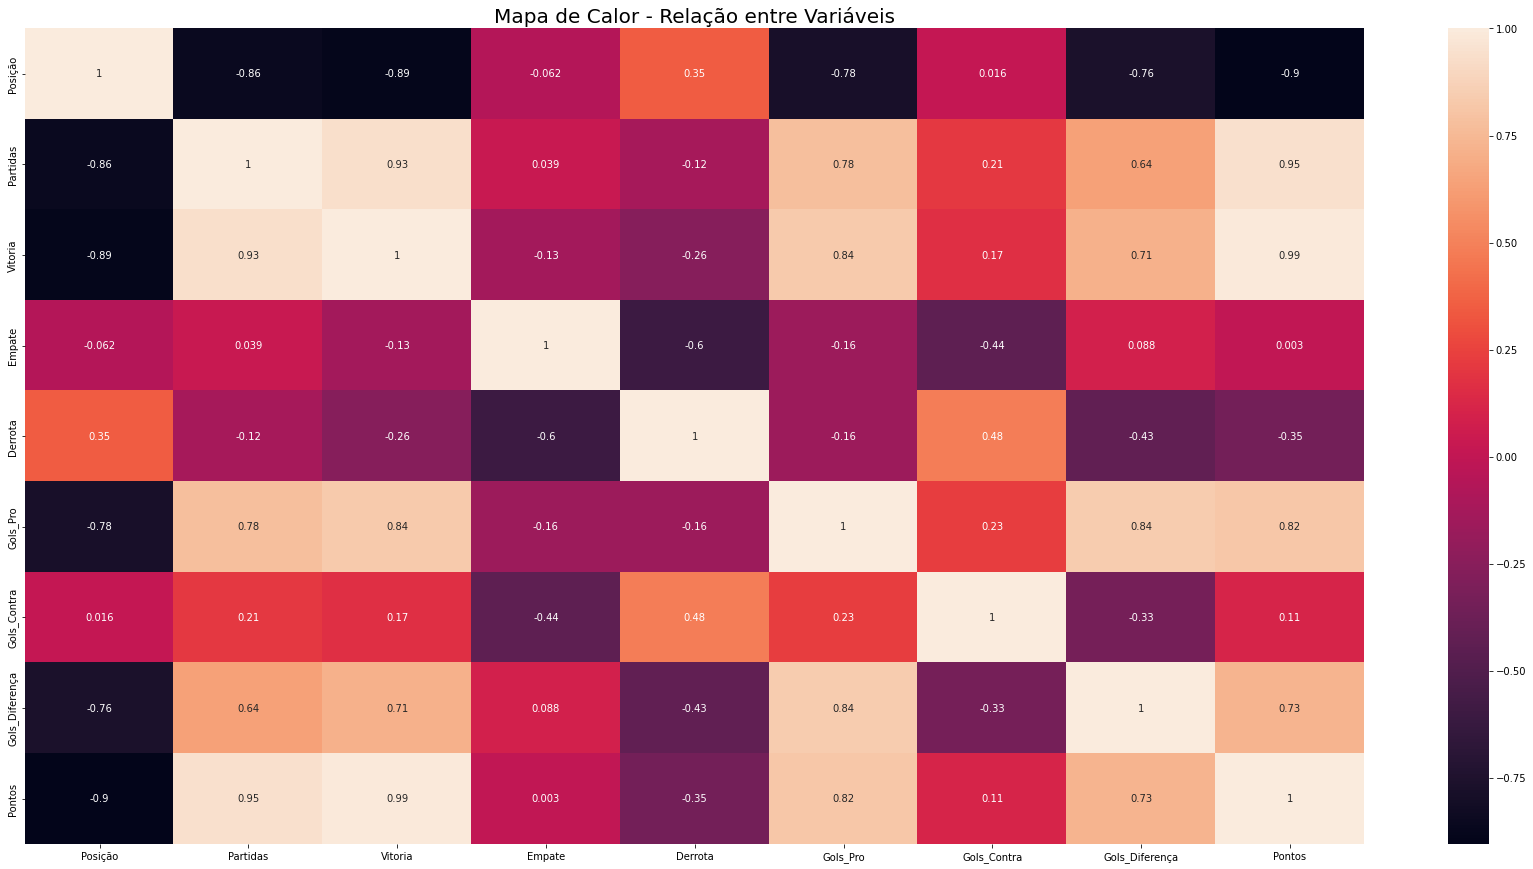

In [26]:
# Mapa de Calor 
plt.figure(figsize=(30,15))
lista=['Posição', 'Time', 'Partidas', 'Vitoria', 'Empate','Derrota','Gols_Pro',  'Gols_Contra','Gols_Diferença','Pontos']

# Correlação no DataSet
corrMatrix = base_dados[lista].corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Mapa de Calor - Relação entre Variáveis', fontsize=20, fontweight=0);
plt.show()

# Uma correlação forte seria a partir de 0.7
# O valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
# Zero implica nenhuma relação